In [1]:
import prody as pd           #import packages
import numpy as np

Struct = pd.parsePDB('6af7') #load and open PDB
Prot = Struct.select('protein') #select only protein
prot_mass_center = pd.calcCenter(Prot, weights=Prot.getMasses()) #calculate protein mass center

betas = []
dist = []
for res in Struct.iterResidues(): #residue iteration and count mean of b-factors and distances between mass centers
    if 'CA' in res.getNames(): #account only protein residue
        beta = np.mean(res.getBetas())  #calculate mean b-factor
        betas.append(beta)
        
        mass_center = pd.calcCenter(res, weights=res.getMasses())  #calculate distance between mass centers
        d = pd.calcDistance(prot_mass_center, mass_center)
        dist.append(d)

@> PDB file is found in working directory (6af7.pdb.gz).
@> 1670 atoms and 1 coordinate set(s) were parsed in 0.04s.


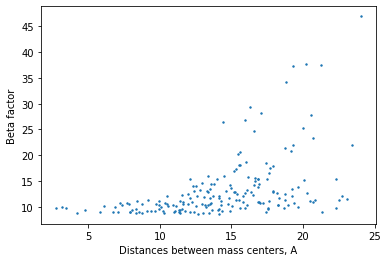

In [6]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(dist, betas, s=2)
ax.set_xlabel('Distances between mass centers, A')
ax.set_ylabel('Beta factor')
fig.show
plt.savefig('prody_bfactor.png')